# Extended Data Figure 2: Hyperparameter changes on visualization and consistency.

### Temperature has the largest effect on visualization (vs. consistency) of the embedding

- shown by a range from 0.1 to 3.21 (highest consistency for Rat 1), as can be appreciated in 3D (top) and post FastICA into a 2D embedding (middle). Bottom row shows the corresponding change on mean consistency.

- Note, tempature is both a learnable and easily modified parameter in CEBRA.

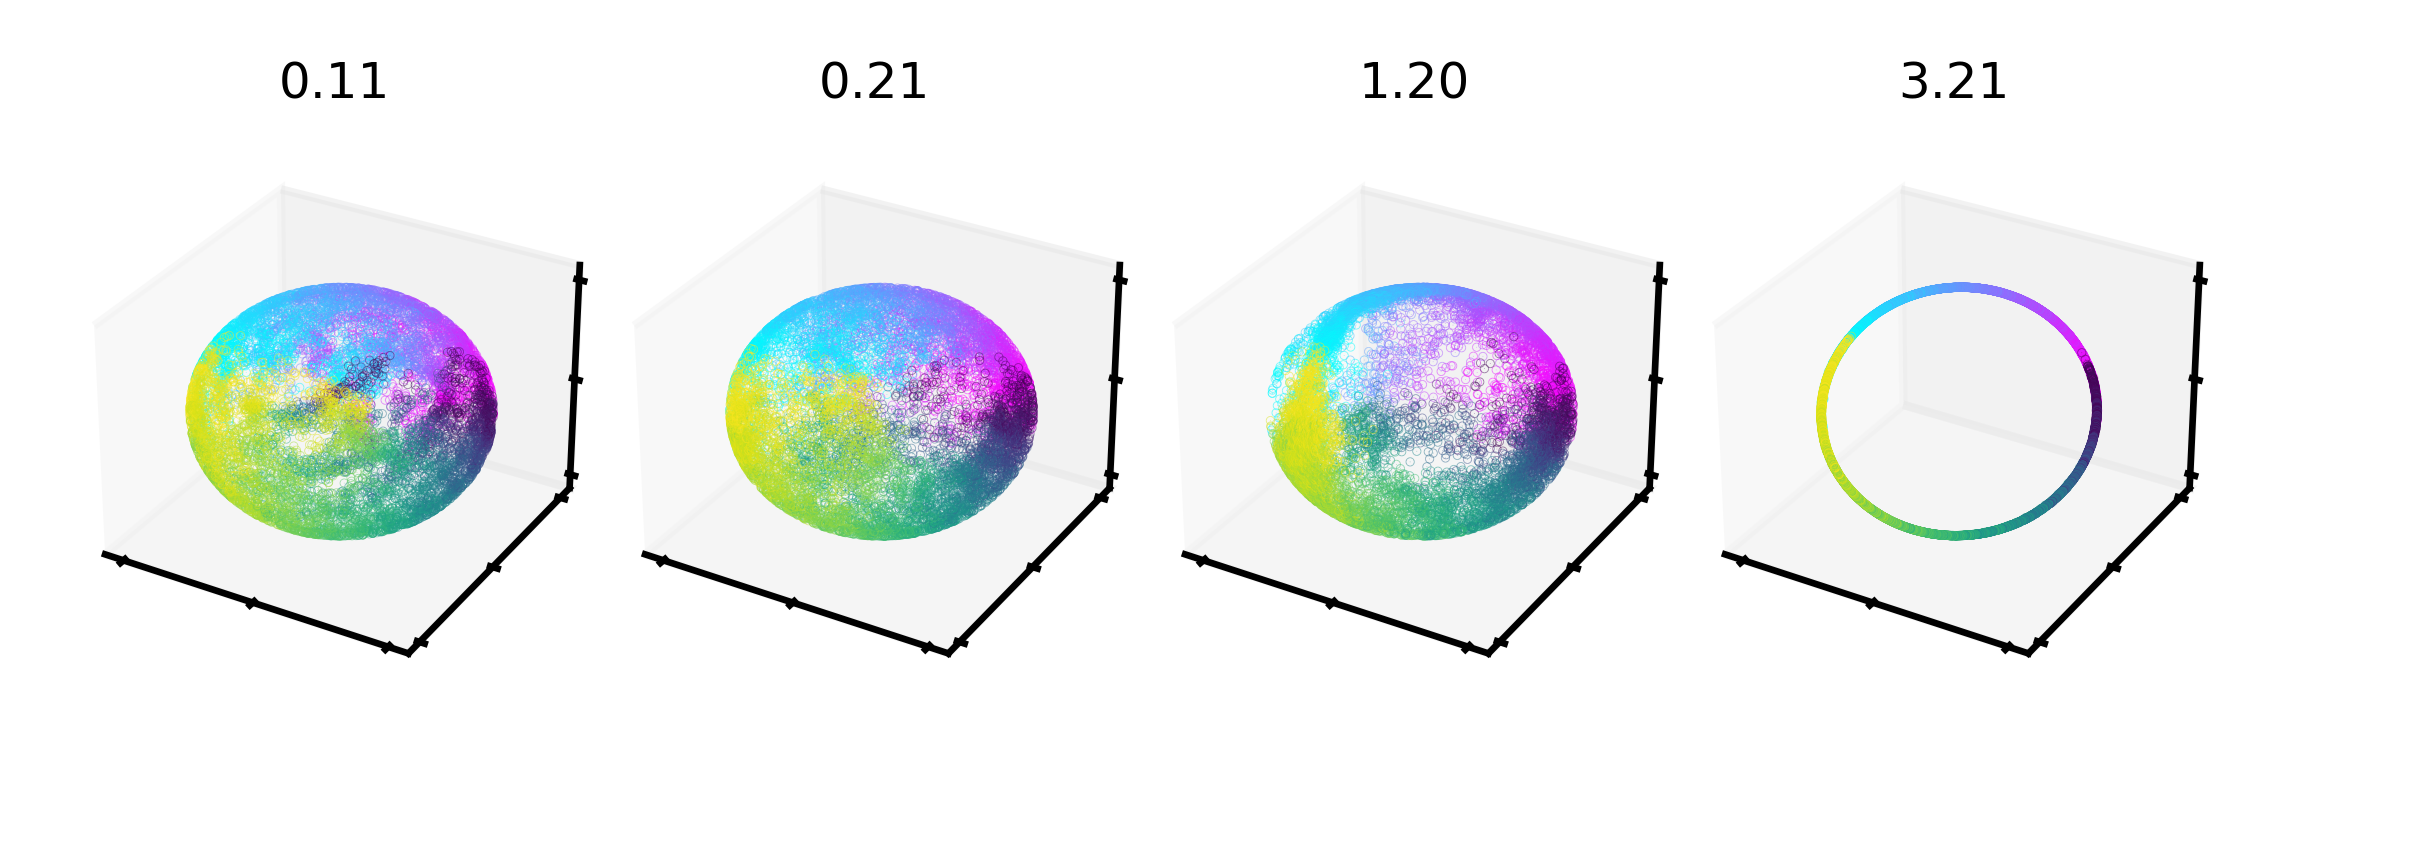

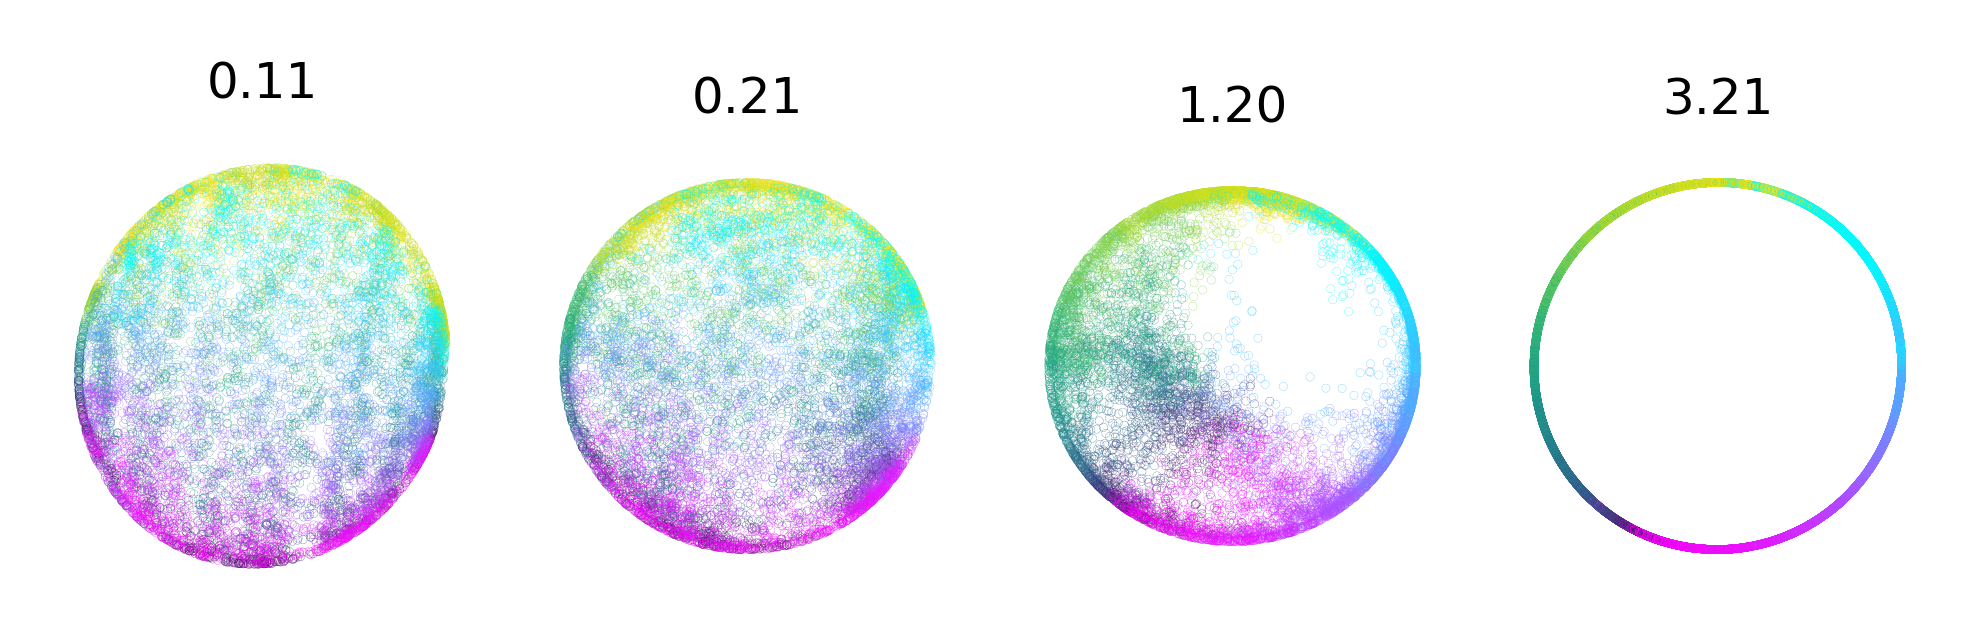

In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


def _rotate(angle):
    rot = np.eye(2) * np.cos(angle)
    rot[1, 0] = np.sin(angle)
    rot[0, 1] = -rot[1, 0]
    return rot


def scatter(data, index, ax, s=0.01, alpha=0.5, **kwargs):
    mask = index[:, 1] > 0
    ax.scatter(
        *data[mask].T, c=index[mask, 0], s=s, cmap="viridis_r", alpha=alpha, **kwargs
    )
    ax.scatter(
        *data[~mask].T, c=index[~mask, 0], s=s, cmap="cool", alpha=alpha, **kwargs
    )


def plot_across_temperatures(embeddings):
    display(HTML("<h2>3D CEBRA-Time</h2>"))
    fig = plt.figure(figsize=(4, 4), dpi=600)
    for i, args, embedding, data, ica, labels in embeddings.values:
        data = data @ np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
        ax = fig.add_subplot(1, 4, i + 1, projection="3d")
        scatter(data, labels, ax)
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.set_zlim([-1.1, 1.1])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.grid(visible=False)
        ax.set_title("{temperature:.2f}".format(**args), fontsize=6)

    fig.subplots_adjust(left=0, wspace=-0.0)
    plt.show()

    display(HTML("<h2>3D CEBRA-Time with FastICA -> 2D projection</h2>"))
    fig = plt.figure(figsize=(4, 1), dpi=600)
    for i, args, embedding, data, ica, labels in embeddings.values:
        ax = fig.add_subplot(1, 4, i + 1)
        rot = _rotate(np.pi)
        scatter(ica @ rot, labels, ax, s=0.001, alpha=0.9, marker="o")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(visible=False)
        ax.set_aspect("equal")
        ax.axis("off")
        ax.set_title("{temperature:.2f}".format(**args), fontsize=6)

    plt.show()


embeddings = pd.read_hdf("../data/EDFigure2.h5", key="data")
plot_across_temperatures(embeddings)

- Orange line denotes the median and black dots are individual runs (subject consistency: 10 runs with 3 comparisons per rat; run consistency: 10 runs, each compared to 9 remaining runs).

In [2]:
# Consistency comparison across temperature values